In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [20]:
with open('mta_clean_by_day.pickle','rb') as read_file:
    mta_by_day = pickle.load(read_file)

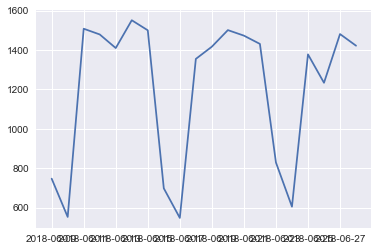

In [27]:
# plot one turnstile
(
plt.plot(mta_by_day[(mta_by_day['SCP']=='02-00-00')
        & (mta_by_day['STATION']=='59 ST')]['DAY']
        ,mta_by_day[(mta_by_day['SCP']=='02-00-00')
        & (mta_by_day['STATION']=='59 ST')]['DAILY COUNTS'])
)    

In [22]:
# Sum the turnstile counts to station daily counts
count_by_station = mta_by_day.groupby(['STATION','DIVISION','DAY','NAME OF DAY','WEEK NUMBER'])['DAILY COUNTS','DAILY EXITS'].sum().reset_index()


In [23]:
count_by_station.head(10)

,STATION,DIVISION,DAY,NAME OF DAY,WEEK NUMBER,DAILY COUNTS,DAILY EXITS
0,1 AV,BMT,2018-06-09,Saturday,24,18889.0,20128.0
1,1 AV,BMT,2018-06-10,Sunday,24,14367.0,16176.0
2,1 AV,BMT,2018-06-11,Monday,24,21548.0,23359.0
3,1 AV,BMT,2018-06-12,Tuesday,24,22581.0,23998.0
4,1 AV,BMT,2018-06-13,Wednesday,24,22684.0,24213.0
5,1 AV,BMT,2018-06-14,Thursday,24,23746.0,25031.0
6,1 AV,BMT,2018-06-15,Friday,24,22554.0,23736.0
7,1 AV,BMT,2018-06-16,Saturday,25,17680.0,19363.0
8,1 AV,BMT,2018-06-17,Sunday,25,13188.0,15384.0
9,1 AV,BMT,2018-06-18,Monday,25,20441.0,22704.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0fefd6a0>,
      dtype=object)

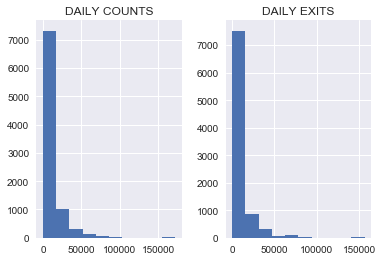

In [24]:
count_by_station.hist(['DAILY COUNTS','DAILY EXITS'])

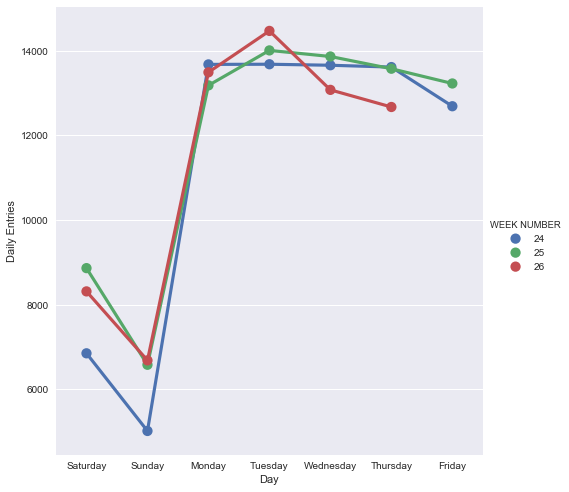

In [25]:
# Select one station and plot by week
mask = (count_by_station['STATION'] == '86 ST') & (count_by_station['DIVISION'] == 'BMT')
sns.set()
fig = sns.factorplot(x='NAME OF DAY',y='DAILY COUNTS',hue ='WEEK NUMBER', size=7, data = count_by_station[mask])
fig.set_axis_labels('Day','Daily Entries')

# TOTALS BY STATION / DIVISION 

In [28]:
totals_by_station = count_by_station.groupby(['STATION','DIVISION'])['DAILY COUNTS','DAILY EXITS'].sum().reset_index()

In [30]:
totals_by_station = totals_by_station.sort_values('DAILY COUNTS', ascending = False)
totals_by_station.head(20)

,STATION,DIVISION,DAILY COUNTS,DAILY EXITS
287,GRD CNTRL-42 ST,IRT,2617020.0,2446281.0
89,42 ST-PORT AUTH,IND,1830374.0,1381056.0
418,TIMES SQ-42 ST,IRT,1605614.0,1340308.0
81,34 ST-PENN STA,IRT,1486414.0,1210294.0
80,34 ST-PENN STA,IND,1422052.0,1260938.0
78,34 ST-HERALD SQ,IND,1381388.0,1279008.0
22,14 ST-UNION SQ,BMT,1330926.0,1145367.0
139,86 ST,IRT,1210198.0,1097619.0
278,FULTON ST,IND,1133014.0,632621.0
110,59 ST COLUMBUS,IND,1010398.0,815947.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a10cc6470>,
      dtype=object)

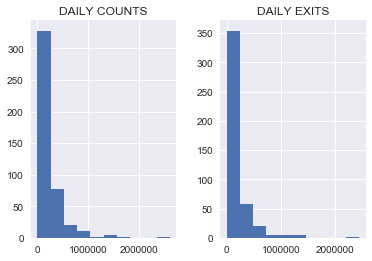

In [31]:
totals_by_station.hist()

In [32]:
with open('mta_counts_total.pickle', 'wb') as to_write:
    pickle.dump(totals_by_station, to_write)